# Big Data Wrangling With Google Books Ngrams -Jupyter Notebook
Benedikt Middelstaedt - 21/06/2024 - BrainStation Data Science & AI Bootcamp

## Table of content

1. Introduction
2. Loading from S3 bucket into Pandas 
3. Creating a plot 




## 1. Introduction

We have successfully processed the Google Ngrams data set in our EMR. In doing so, we filtered a specific subset of the data set. This filtered data set is now in an Amazon S3 bucket. 

## 2. Loading from S3 bucket into Pandas 

To make the S3 bucket available as a data origin in Pandas, the s3fs module must be installed by calling the pip installer. 

In [1]:
!pip install s3fs

import pandas as pd 

Retrieve the filtered data directly from the S3 bucket. To do this, the authentication within the kernel must be carried out in aws config in the corresponding region.

In [2]:
filtered_data = pd.read_csv('s3://benediktmiddy-big-data-bucket/filter.csv')

## 3. Creating a Plot

In [3]:
#get an overview
filtered_data

,token,year,frequency,pages,books
0,token,year,frequency,pages,books
1,data,1584,16,14,1
2,data,1614,3,2,1
3,data,1627,1,1,1
4,data,1631,22,18,1
...,...,...,...,...,...
312,data,2004,201841,93539,3483
313,data,2005,197467,88901,3392
314,data,2006,203669,92960,3449
315,data,2007,168338,78986,3246


In [4]:
# basic cleaning of the dataset
filtered_data.drop(index=0, inplace =True)
filtered_data.reset_index(inplace=True)
filtered_data.drop(columns='index', inplace=True)

In [5]:
# get an overview of the datatypes
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   token      316 non-null    object
 1   year       316 non-null    object
 2   frequency  316 non-null    object
 3   pages      316 non-null    object
 4   books      316 non-null    object
dtypes: object(5)
memory usage: 12.5+ KB


In [7]:
#transform the datatype of the frequency column into integers
filtered_data['frequency'] = filtered_data['frequency'].astype(int)


# normal aproach, but the date 1584 is out of daterange in Pandas..

# filtered_data['year'] = pd.to_datetime(filtered_data['year'], errors = 'coerce')

#..but year as a int do the trick in this case

filtered_data['year'] = filtered_data['year'].astype(int)

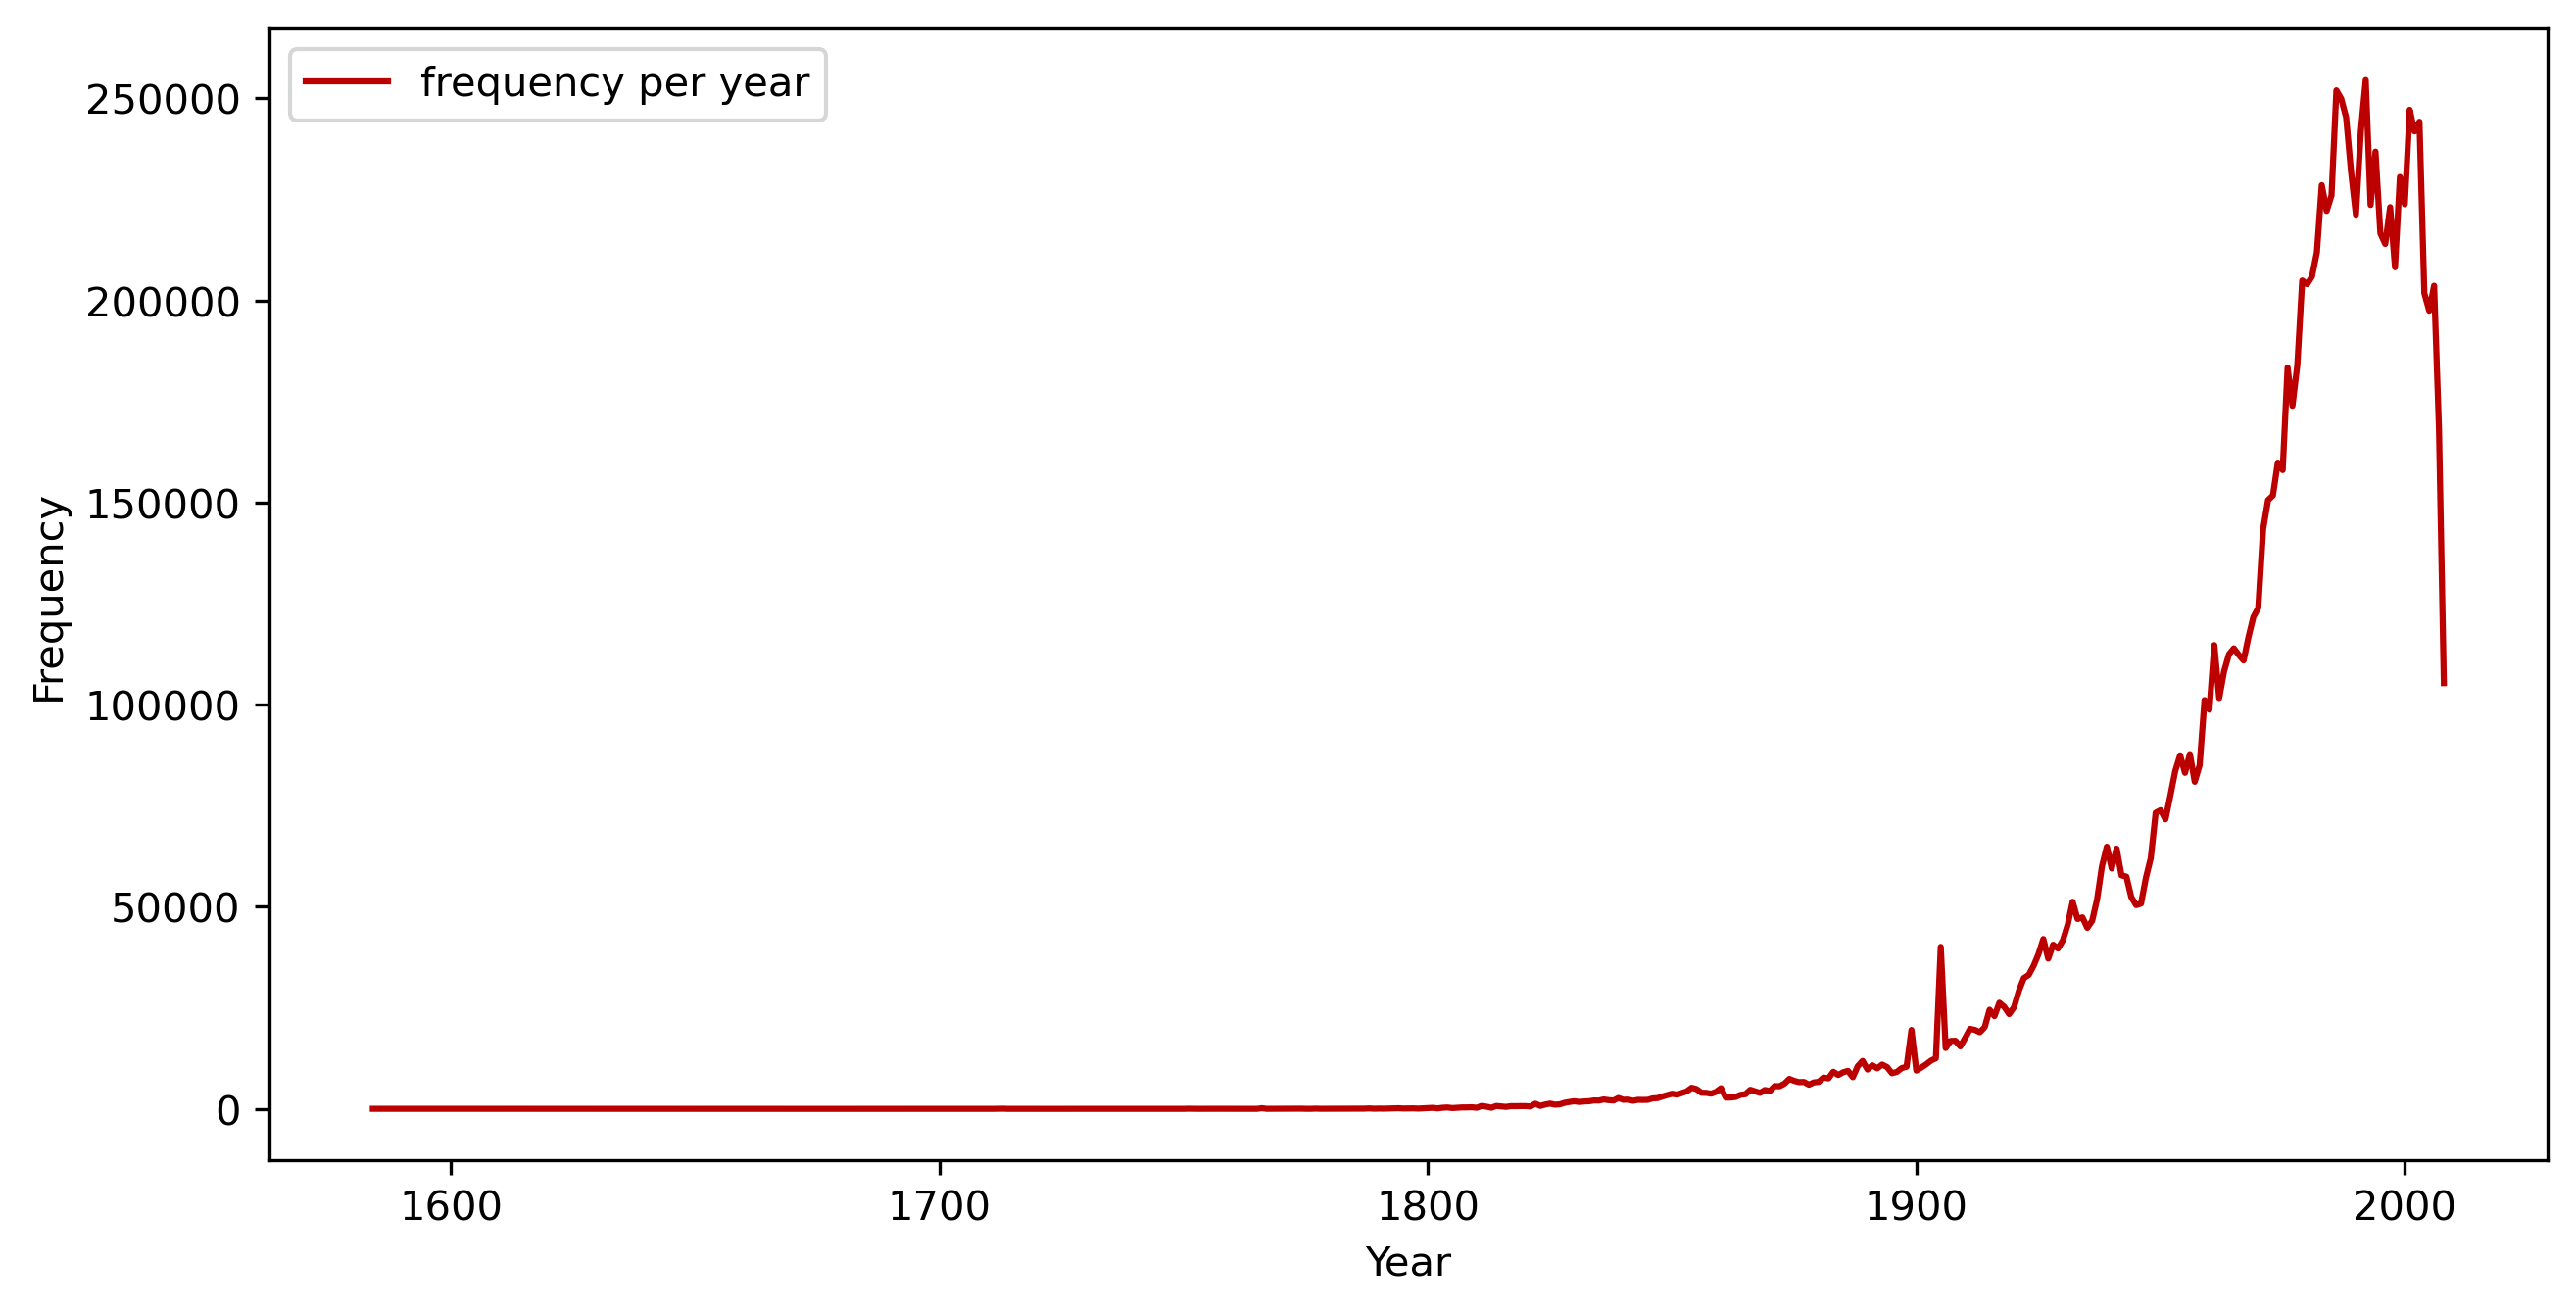

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,5), dpi= 300)
plt.plot(filtered_data['year'], filtered_data['frequency'], color = '#bc0000', label = 'frequency per year')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

We see an increase from the beginning of industrialisation or the availability of books and the growing number of readers. This increase peaks between 1970 and 2000 and falls rapidly after the turn of the millennium. The reasons for this need to be explored. The outliers around the turn of the century and the early 1900s are also interesting 